# Week 8 Notes

## Bifurcation

Differential equation:  $ \displaystyle\frac{dx}{dt} = x(x-b)^2 $

Approximate the derivative:  $ \displaystyle\frac{\Delta x}{\Delta t} = x(x-b)^2 $

Goal:  Turn this difference equation into a recursive formula.

1. Pick an interval $ [0,T] $
2. Pick a step size $ \Delta t $

Rewrite difference equation:  $ \displaystyle\frac{x(t+\Delta t)-x(t)}{\Delta t} = x(t)(x(t) - b)^2 $

Solve for $ x(t + \Delta t) $:  $$ \quad x(t + \Delta t) = x(t) + \Delta t * x(t)*(x(t) - b)^2 $$

### Generating in python

In [1]:
T = 5
delta_t = 0.1
tt = [i*delta_t for i in range(0,int(T/delta_t)+1)]

In [2]:
tt[:10]

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

We now have list `tt` containing the $ t $ values from 0 up to $ T $ stepping by $ \Delta t $.
We can think about this list as $ [t_0,t_1,t_2,...,t_N] $ where $ N = T/\Delta t $.

In our example, $ N = T/\Delta t = 5/0.1 = 50 $.

In [3]:
x_init = 0.2
b=1
xx = [x_init]
for i in range(1,len(tt)):
    x = xx[i-1] + delta_t*xx[i-1]*(xx[i-1]-b)**2
    xx.append(x)

In [4]:
xx[:10]

[0.2,
 0.21280000000000002,
 0.22598687211520002,
 0.23952566250876897,
 0.2533779397967881,
 0.26750235371270953,
 0.28185526745041367,
 0.2963914414960204,
 0.3110647445011455,
 0.32582886603394284]

In [5]:
import matplotlib.pyplot as plt

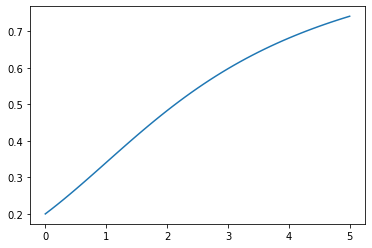

In [6]:
plt.plot(tt,xx)

In [7]:
def difference_equation(x_init,b,T,delta_t):
    tt = [i*delta_t for i in range(0,int(T/delta_t)+1)]
    xx = [x_init]
    for i in range(1,len(tt)):
        x = xx[i-1] + delta_t*xx[i-1]*(xx[i-1]-b)**2
        xx.append(x)
    return tt,xx

In [8]:
inputs,outputs = difference_equation(0.2,1,5,0.1)

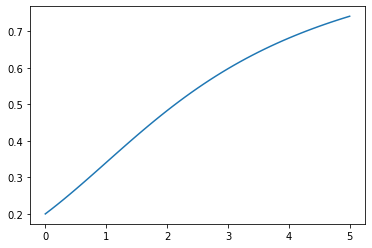

In [9]:
plt.plot(inputs,outputs)

### Exploring initial value

In [10]:
inputs1,outputs1 = difference_equation(0.2,1,5,0.01)

In [11]:
inputs2,outputs2 = difference_equation(0.5,1,5,0.01)

In [12]:
inputs3,outputs3 = difference_equation(1,1,5,0.01)

In [13]:
inputs4,outputs4 = difference_equation(1.1,1,5,0.01)

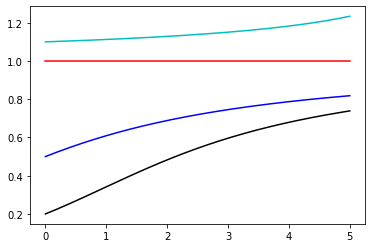

In [14]:
plt.plot(inputs1,outputs1,'k-',inputs2,outputs2,'b-',inputs3,outputs3,'r-',inputs4,outputs4,'c-')
plt.show()

#### Plot the dependence on initial value

Plot a graph where the inputs are various initial values
and the outputs are a chosen x value.

In [15]:
def initial_bifurcation(b,T,delta_t,t):
    initial_values = [0.01*n for n in range(110)]
    x_values = []
    for x_init in initial_values:
        x = difference_equation(x_init,b,T,delta_t)[1][int(t/delta_t)]
        x_values.append(x)
    return initial_values,x_values

In [16]:
inputs,outputs = initial_bifurcation(1,5,0.1,3)

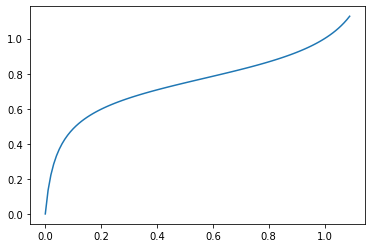

In [17]:
plt.plot(inputs,outputs)

In [18]:
inputs1,outputs1 = initial_bifurcation(1,5,0.1,1)

In [19]:
inputs2,outputs2 = initial_bifurcation(1,5,0.1,2)

In [20]:
inputs3,outputs3 = initial_bifurcation(1,5,0.1,3)

In [21]:
inputs4,outputs4 = initial_bifurcation(1,5,0.1,4)

In [22]:
inputs5,outputs5 = initial_bifurcation(1,5,0.1,5)

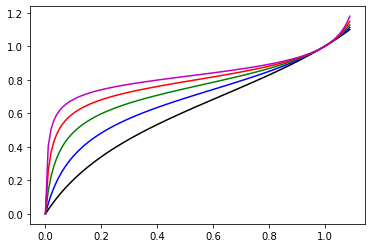

In [23]:
plt.plot(inputs1,outputs1,'k-',inputs2,outputs2,'b-',inputs3,outputs3,'g-',inputs4,outputs4,'r-',inputs5,outputs5,'m-')
plt.show()

### Exploring the parameter $ b $

In [25]:
def b_bifurcation(x_init,T,delta_t,t):
    b_values = [0.01*n for n in range(20,110)]  # The b parameter values will be our inputs
    x_values = []                               # The sample point will be our output
    for b in b_values:
        x = difference_equation(x_init,b,T,delta_t)[1][int(t/delta_t)]
                                                # Calculate the solution function and sample at the given t value
        x_values.append(x)
    return b_values,x_values

In [26]:
inputs,outputs = b_bifurcation(0.2,5,0.1,3)

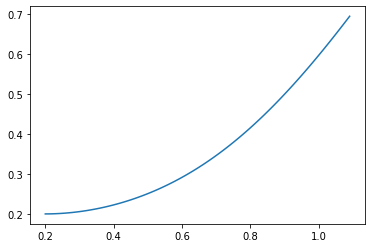

In [27]:
plt.plot(inputs,outputs)
plt.show()

In [28]:
inputs1,outputs1 = b_bifurcation(0.2,5,0.1,1)
inputs2,outputs2 = b_bifurcation(0.2,5,0.1,2)
inputs3,outputs3 = b_bifurcation(0.2,5,0.1,3)
inputs4,outputs4 = b_bifurcation(0.2,5,0.1,4)
inputs5,outputs5 = b_bifurcation(0.2,5,0.1,5)

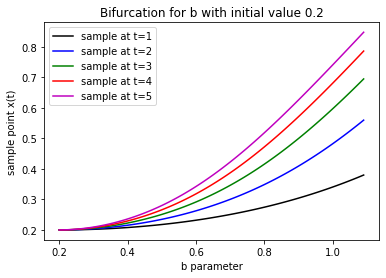

In [33]:
plt.plot(inputs1,outputs1,'k-',
         inputs2,outputs2,'b-',
         inputs3,outputs3,'g-',
         inputs4,outputs4,'r-',
         inputs5,outputs5,'m-')
plt.xlabel('b parameter')
plt.ylabel('sample point x(t)')
plt.title('Bifurcation for b with initial value 0.2')
plt.legend(labels=['sample at t=1','sample at t=2','sample at t=3','sample at t=4','sample at t=5'])
plt.show()

Now let's automate the process for producing this bifurcation diagram.

In [34]:
def plot_b_bifurcation(x_init,T,delta_t,sample_points):      # sample_points is a list of where you want to sample x(t)
    for t in sample_points:                                  # step through the list of sample points
        inputs,outputs = b_bifurcation(x_init,T,delta_t,t)   # for each sample point, call the bifurcation function
        plt.plot(inputs,outputs)                             # plot the results
    plt.xlabel('b parameter')                                # We are not outside the for loop to label the plot
    plt.ylabel('sample point x(t)')
    plt.title('Bifurcation for b with initial value 0.2')
    sample_labs = ['sample at t={}'.format(point) for point in sample_points]
                                                             # This sets up the list of labels for the legend using string
                                                             # formatting
    plt.legend(labels=sample_labs)                           # create the legend using the above list as the labels.
    plt.show()

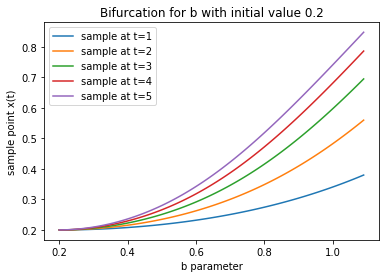

In [35]:
plot_b_bifurcation(0.2,5,0.1,[1,2,3,4,5])

We now have a single command to produce a bifurcation diagram with a range of sample points and a fixed initial value.